# Importing the historical prices

In [1]:
#Dataset imports
import yfinance as yf

#Standard imports
import pandas as pd
import numpy as np

#Visualization imports
from matplotlib import pyplot as plt
import seaborn as sns

#Model imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#To hide warnings
import warnings
warnings.filterwarnings('ignore')

import math

In [2]:
ticker = "ORCL"
start_date = "2022-06-22"
end_date = "2023-06-22"
df = yf.download(ticker, start_date, end_date)
# new.to_csv('Dataset.csv')
# df = pd.read_csv('Dataset.csv')

[*********************100%***********************]  1 of 1 completed


In [3]:
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-22,66.930000,67.570000,66.379997,66.529999,65.146484,8219900
2022-06-23,66.449997,67.870003,66.309998,67.629997,66.223610,8775800
2022-06-24,68.330002,70.779999,67.970001,70.699997,69.229767,20132600
2022-06-27,69.370003,70.849998,68.940002,70.410004,68.945801,8840600
2022-06-28,70.570000,71.070000,68.529999,68.580002,67.153862,7252100
...,...,...,...,...,...,...
2023-06-14,116.500000,122.510002,115.739998,122.269997,121.842400,26264200
2023-06-15,121.949997,127.540001,121.660004,126.550003,126.107445,27476700
2023-06-16,127.139999,127.400002,125.150002,125.459999,125.021248,19511500


In [4]:
df.index

DatetimeIndex(['2022-06-22', '2022-06-23', '2022-06-24', '2022-06-27',
               '2022-06-28', '2022-06-29', '2022-06-30', '2022-07-01',
               '2022-07-05', '2022-07-06',
               ...
               '2023-06-07', '2023-06-08', '2023-06-09', '2023-06-12',
               '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16',
               '2023-06-20', '2023-06-21'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

# Plotting the data

<AxesSubplot:xlabel='Date'>

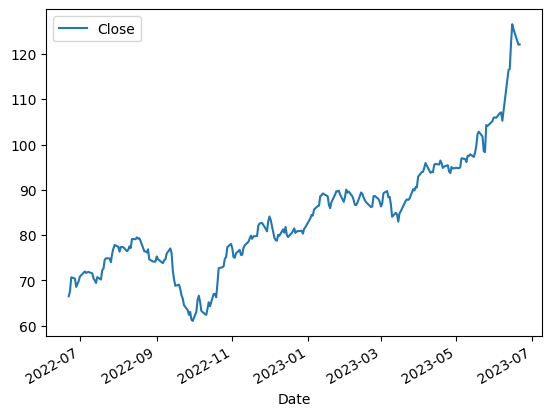

In [5]:
df.plot.line(y="Close", use_index=True)

In [6]:
print(df.describe())


             Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean    83.358884   84.360757   82.611235   83.570598   82.738603   
std     12.453277   12.627331   12.369649   12.542082   12.799307   
min     60.990002   62.139999   60.779999   61.070000   60.067478   
25%     74.810001   75.875000   74.290001   74.965000   74.016968   
50%     81.330002   82.209999   80.610001   81.500000   80.574173   
75%     89.505001   90.494999   88.750000   89.719997   89.033401   
max    127.139999  127.540001  125.150002  126.550003  126.107445   

             Volume  
count  2.510000e+02  
mean   8.231682e+06  
std    4.849350e+06  
min    2.754900e+06  
25%    5.674300e+06  
50%    7.053000e+06  
75%    8.818400e+06  
max    3.919090e+07  


# Keeping only the required columns

In [7]:

df = df[["Close"]]

In [8]:
df

,Close
Date,
2022-06-22,66.529999
2022-06-23,67.629997
2022-06-24,70.699997
2022-06-27,70.410004
2022-06-28,68.580002
...,...
2023-06-14,122.269997
2023-06-15,126.550003
2023-06-16,125.459999


In [9]:
print(df.describe())

            Close
count  251.000000
mean    83.570598
std     12.542082
min     61.070000
25%     74.965000
50%     81.500000
75%     89.719997
max    126.550003


# Adding technical indicators

In [10]:
import pandas_ta

In [11]:
#Appending EMA(Estimated Moving Average) column to dataframe by appending
df.ta.ema(close='close', length = 10, append = True)
df

,Close,EMA_10
Date,,
2022-06-22,66.529999,NaN
2022-06-23,67.629997,NaN
2022-06-24,70.699997,NaN
2022-06-27,70.410004,NaN
2022-06-28,68.580002,NaN
...,...,...
2023-06-14,122.269997,111.887190
2023-06-15,126.550003,114.553156
2023-06-16,125.459999,116.536219


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-06-22 to 2023-06-21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   251 non-null    float64
 1   EMA_10  242 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB
None


# Checking and visualizing correlation

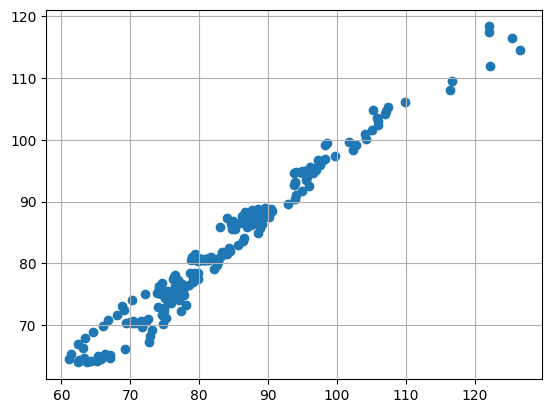

In [13]:
plt.scatter(df['Close'], df['EMA_10'])
plt.grid()
plt.show()

           Close    EMA_10
Close   1.000000  0.985813
EMA_10  0.985813  1.000000


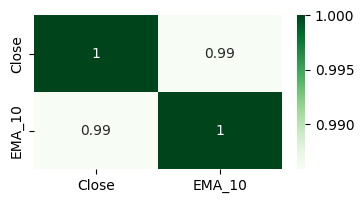

In [14]:
print(df.corr())
plt.figure(figsize=(4,2))
sns.heatmap(df.corr(), cmap="Greens", annot=True)
plt.show()

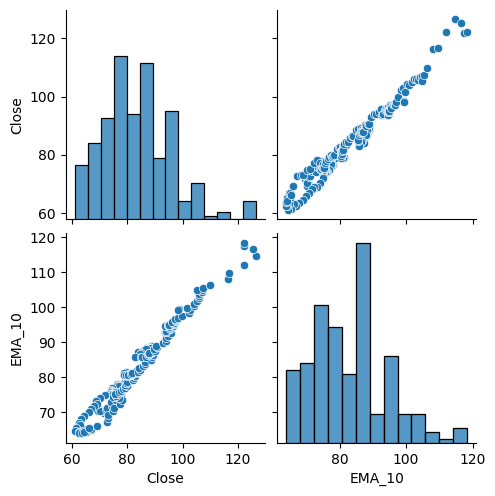

In [15]:
sns.pairplot(df)

# Removing NULL values from DataFrame

In [16]:
# Dropping the first n (10 in this case) rows 
df=df.iloc[10:]
df

,Close,EMA_10
Date,,
2022-07-07,71.830002,70.124092
2022-07-08,71.870003,70.441530
2022-07-11,71.570000,70.646706
2022-07-12,70.410004,70.603669
2022-07-13,70.029999,70.499366
...,...,...
2023-06-14,122.269997,111.887190
2023-06-15,126.550003,114.553156
2023-06-16,125.459999,116.536219


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2022-07-07 to 2023-06-21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   241 non-null    float64
 1   EMA_10  241 non-null    float64
dtypes: float64(2)
memory usage: 5.6 KB
None


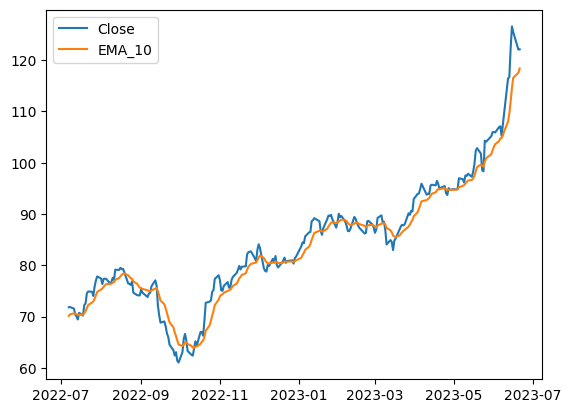

In [18]:
plt.plot(df)
plt.legend(df)
plt.show()

# Splitting the data

In [19]:
from sklearn.model_selection import train_test_split

#Using an 80-20 split into training and testing sets

var1 = df[['Close']] #Independent Variable
var2 = df[['EMA_10']] #Dependent Variable

X_train, X_test, y_train, y_test = train_test_split(var1, var2, test_size=.2)

In [20]:
#training set
print(X_train.describe())
print()
print(y_train.describe())

            Close
count  192.000000
mean    84.868125
std     12.815447
min     61.400002
25%     76.432499
50%     83.189999
75%     90.537502
max    126.550003

           EMA_10
count  192.000000
mean    83.908141
std     11.549177
min     63.925228
25%     75.482526
50%     81.522760
75%     88.847421
max    118.366559


In [21]:
#test set
print(X_test.describe())
print()
print(y_test.describe())

            Close
count   49.000000
mean    81.307959
std     10.649305
min     61.070000
25%     74.860001
50%     81.389999
75%     88.599998
max    102.339996

          EMA_10
count  49.000000
mean   80.604285
std    10.297207
min    63.957502
25%    72.735666
50%    80.543125
75%    88.110975
max    99.233676


# Training the model

In [22]:
from sklearn.linear_model import LinearRegression

#Creating the regression model
model = LinearRegression()

#Training the model
model.fit(X_train, y_train)

#Using model to make predictions
y_pred = model.predict(X_test)
y_pred


array([[67.16232793],
       [97.15489114],
       [84.6120671 ],
       [92.79912985],
       [99.43944606],
       [67.80236004],
       [74.82492406],
       [75.01159896],
       [83.41200349],
       [75.40273121],
       [92.76357175],
       [72.68259473],
       [88.23890443],
       [85.54544161],
       [68.04236869],
       [84.86096697],
       [72.35369423],
       [92.71912244],
       [86.49659856],
       [95.44814336],
       [73.09150263],
       [85.49210786],
       [87.22552251],
       [75.24272318],
       [70.02469   ],
       [87.57220544],
       [83.96314376],
       [95.86594247],
       [77.2250377 ],
       [78.38954321],
       [87.01218074],
       [84.25649295],
       [77.39393695],
       [76.38944625],
       [62.7532261 ],
       [77.26948702],
       [87.95444647],
       [77.86506982],
       [64.53998129],
       [75.04715706],
       [91.8124148 ],
       [75.72274726],
       [80.81632373],
       [81.19856475],
       [80.91410679],
       [66

# Vaildation of the model

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("Intercept", model.intercept_)


Model Coefficients: [[0.88893198]]
Mean Absolute Error: 1.4956589226492643
Coefficient of Determination: 0.9630082630963523
Root Mean Squared Error: 1.9601728429858436
Intercept [8.46615016]


<Figure size 100x100 with 0 Axes>

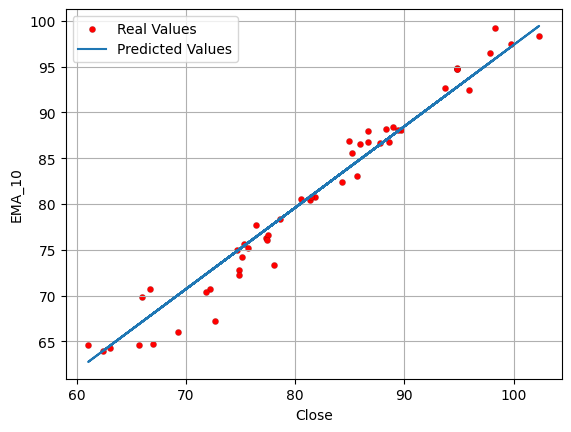

<Figure size 100x100 with 0 Axes>

In [24]:
#Testing data accuracy (With test set)

plt.scatter(X_test, y_test, color = 'red', edgecolor='black',linewidth=0.1, label = 'Real Values', s=20)
plt.plot(X_test, model.predict(X_test), label = 'Predicted Values')
plt.grid()
plt.legend()
plt.xlabel('Close')
plt.ylabel('EMA_10')
plt.figure(figsize=(1, 1))

<Figure size 100x100 with 0 Axes>

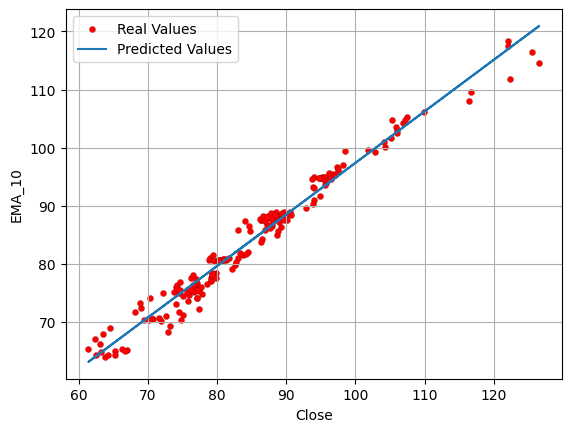

<Figure size 100x100 with 0 Axes>

In [25]:
#Testing data accuracy (With training set)

plt.scatter(X_train, y_train, color = 'red', edgecolor='black',linewidth=0.1, label = 'Real Values', s=20)
plt.plot(X_train, model.predict(X_train), label = 'Predicted Values')
plt.grid()
plt.legend()
plt.xlabel('Close')
plt.ylabel('EMA_10')
plt.figure(figsize=(1, 1))

<AxesSubplot:title={'center':'Distribution of Residuals'}, ylabel='Density'>

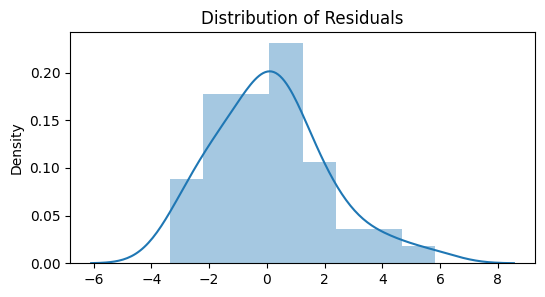

In [26]:
#Residual Plot
residual_model = y_pred - y_test
plt.subplots(figsize=(6, 3))
plt.title("Distribution of Residuals")
sns.distplot(residual_model)

# Comparing Real v/s Predicted Values

In [27]:
comparison = y_test
comparison['predictions'] = y_pred
comparison = comparison.rename(columns={"EMA_10": "Actual_Values","predictions": "Predicted_Values"})
comparison.head(10)

,Actual_Values,Predicted_Values
Date,,
2022-09-22,69.877872,67.162328
2023-05-17,97.456459,97.154891
2023-01-06,83.025477,84.612067
2023-05-01,94.736874,92.799130
2023-05-18,98.344375,99.439446
2022-09-21,70.732955,67.802360
2022-09-08,74.946139,74.824924
2022-07-25,72.735666,75.011599
2023-01-05,82.440026,83.412003


<AxesSubplot:xlabel='Date', ylabel='Prices'>

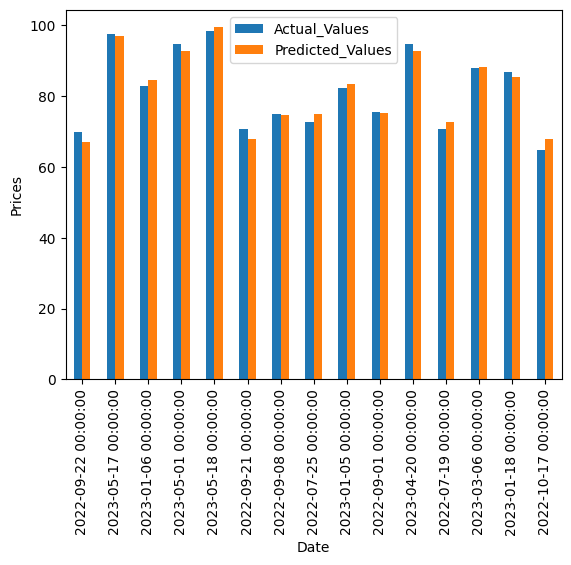

In [28]:
graph = comparison.head(15)
graph.plot(kind='bar', ylabel='Prices')


<AxesSubplot:xlabel='Date'>

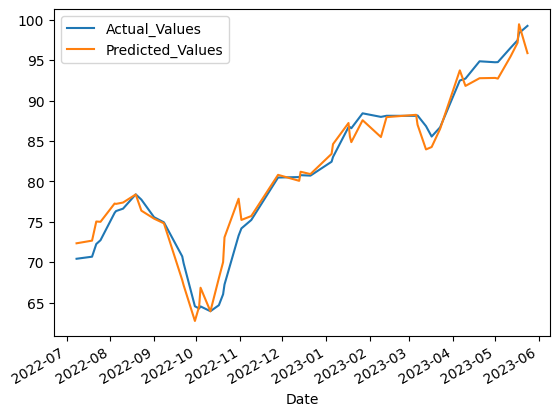

In [29]:
comparison.plot.line()

In [30]:
import math
x2=abs(y_pred-y_test)
x2 = x2.drop(['predictions'], axis=1)

In [31]:
y_test = y_test.drop(['predictions'], axis = 1)

In [32]:

y2 = 100 * (x2/y_test)
accuracy = 100 - np.mean(y2)
print('Accuracy: ', round(accuracy,2), '%')

Accuracy:  EMA_10    98.06
dtype: float64 %


# Strategy Checking

In [33]:
ticker = "ORCL"
start_date = "2023-01-22"
end_date = "2023-06-22"
new = yf.download(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [34]:
new

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-23,87.190002,89.129997,86.970001,88.970001,88.289139,7390200
2023-01-24,89.050003,90.099998,88.000000,89.699997,89.013550,7004600
2023-01-25,88.699997,89.860001,87.739998,89.639999,88.954018,5896800
2023-01-26,89.889999,90.489998,89.089996,89.830002,89.142563,7302800
2023-01-27,89.500000,89.720001,88.959999,88.989998,88.308983,5676800
...,...,...,...,...,...,...
2023-06-14,116.500000,122.510002,115.739998,122.269997,121.842400,26264200
2023-06-15,121.949997,127.540001,121.660004,126.550003,126.107445,27476700
2023-06-16,127.139999,127.400002,125.150002,125.459999,125.021248,19511500


In [35]:
new = new.drop(['High','Low','Adj Close','Volume'], axis=1)

In [36]:
new

,Open,Close
Date,,
2023-01-23,87.190002,88.970001
2023-01-24,89.050003,89.699997
2023-01-25,88.699997,89.639999
2023-01-26,89.889999,89.830002
2023-01-27,89.500000,88.989998
...,...,...
2023-06-14,116.500000,122.269997
2023-06-15,121.949997,126.550003
2023-06-16,127.139999,125.459999


In [37]:
new.ta.ema(close='close', length = 10, append = True)

Date
2023-01-23           NaN
2023-01-24           NaN
2023-01-25           NaN
2023-01-26           NaN
2023-01-27           NaN
                 ...    
2023-06-14    111.887190
2023-06-15    114.553156
2023-06-16    116.536219
2023-06-20    117.536906
2023-06-21    118.366559
Name: EMA_10, Length: 104, dtype: float64

In [38]:
print(new)
new=new.iloc[10:]
new

                  Open       Close      EMA_10
Date                                          
2023-01-23   87.190002   88.970001         NaN
2023-01-24   89.050003   89.699997         NaN
2023-01-25   88.699997   89.639999         NaN
2023-01-26   89.889999   89.830002         NaN
2023-01-27   89.500000   88.989998         NaN
...                ...         ...         ...
2023-06-14  116.500000  122.269997  111.887190
2023-06-15  121.949997  126.550003  114.553156
2023-06-16  127.139999  125.459999  116.536219
2023-06-20  124.449997  122.040001  117.536906
2023-06-21  121.949997  122.099998  118.366559

[104 rows x 3 columns]


,Open,Close,EMA_10
Date,,,
2023-02-06,89.510002,88.529999,89.077363
2023-02-07,87.870003,87.739998,88.834206
2023-02-08,86.930000,86.690002,88.444351
2023-02-09,87.139999,86.650002,88.118105
2023-02-10,86.529999,87.139999,87.940268
...,...,...,...
2023-06-14,116.500000,122.269997,111.887190
2023-06-15,121.949997,126.550003,114.553156
2023-06-16,127.139999,125.459999,116.536219


In [39]:
#Predicting the values
close_values = new[['EMA_10']]
my_pred = model.predict(close_values)

In [40]:
new['Predicted Values']=my_pred

In [41]:
new

,Open,Close,EMA_10,Predicted Values
Date,,,,
2023-02-06,89.510002,88.529999,89.077363,87.649867
2023-02-07,87.870003,87.739998,88.834206,87.433717
2023-02-08,86.930000,86.690002,88.444351,87.087162
2023-02-09,87.139999,86.650002,88.118105,86.797152
2023-02-10,86.529999,87.139999,87.940268,86.639067
...,...,...,...,...
2023-06-14,116.500000,122.269997,111.887190,107.926252
2023-06-15,121.949997,126.550003,114.553156,110.296115
2023-06-16,127.139999,125.459999,116.536219,112.058922


In [42]:
new.to_csv('Model_2_Predictions.csv')